# 2 - Generating Synthetic World Population using Pseudorandom numbers (PRN) with numpy

In this notebook, I generate synthetic world populations based on statistic information of population per country from 2019. I use pseudorandom numbers (PRN) with numpy.

### Psuedorandom numbers (PRN) implementation

In [1]:
import numpy
from random import choices

Just a simple function is required:

In [2]:
def generate_numbers(options, frequencies, number):
  return choices(options, frequencies, k=number)

## Synthetic countries population

Data for country populations taken from:<br>
https://data.worldbank.org/indicator/SP.POP.TOTL

Some data preparation has been done using Excel - as most of it was easiest to do via the visual method:
- removal of region totals
- removal of first two rows containing metadata
- removal of all year fields apart from 2019
- removal of Eritrea, as it only contained data up to 2011

In [6]:
# import data into pandas
import pandas as pd
input = pd.read_csv('./population.csv')
input = input.rename(columns={"Country Name": "Country_name", "Country Code": "Country_code", "2019": "Real_pop"})
input.head()

,Country_name,Country_code,Real_pop
0,China,CHN,1397715000
1,India,IND,1366417754
2,United States,USA,328239523
3,Indonesia,IDN,270625568
4,Pakistan,PAK,216565318


In [7]:
# sum the total population
real_total = input['Real_pop'].sum()
print(real_total)

7656340905


In [8]:
# create a new row for percentage of total population
input['Real_perc'] = input['Real_pop']/real_total
input.head()

,Country_name,Country_code,Real_pop,Real_perc
0,China,CHN,1397715000,0.182557
1,India,IND,1366417754,0.178469
2,United States,USA,328239523,0.042872
3,Indonesia,IDN,270625568,0.035347
4,Pakistan,PAK,216565318,0.028286


In [9]:
# number of records to generate
# the same number as real records could be used
#Nrand = real_total
# or a smaller value, e.g. 1 million
Nrand = 1000000


from datetime import datetime
import time as t
start_ts = t.time()
now_start = datetime.now()
print(f"Starting generation on {now_start.strftime('%d/%m/%Y %H:%M:%S')}")
print()

print(Nrand, "Pseudorandom individuals")

# extract lists from the input data
country_list = list(input['Country_name'].values)
country_freq = list(input['Real_perc'].values)
# generate countires
result = choices(country_list, country_freq, k=Nrand)
# count the numbers per country
unique, counts = numpy.unique(result, return_counts=True)
# convert to a dictionary
d = {'Country_name': unique, 'Synth_pop': counts}
# and a dataframe
new_frequencies = pd.DataFrame(data=d)

print()
now_end = datetime.now()
print(f"Generation finished at {now_end.strftime('%d/%m/%Y %H:%M:%S')}")
print(f"Running time: {(t.time()-start_ts)/60} minutes")

Starting generation on 04/09/2021 18:46:34

1000000 Pseudorandom individuals

Generation finished at 04/09/2021 18:46:36
Running time: 0.025602050622304282 minutes


In [10]:
# merge with the original table
output = pd.merge(input, new_frequencies, on='Country_name')

# calculate total for syntheitc output
total = output['Synth_pop'].sum()
# convert to percentages
output['Synth_perc'] = output['Synth_pop']/total
# calculate the difference
output['Diff'] = abs(output['Real_perc']-output['Synth_perc'])
# print end data
output

,Country_name,Country_code,Real_pop,Real_perc,Synth_pop,Synth_perc,Diff
0,China,CHN,1397715000,0.182557,182995,0.182995,4.384737e-04
1,India,IND,1366417754,0.178469,177740,0.177740,7.287713e-04
2,United States,USA,328239523,0.042872,42884,0.042884,1.240806e-05
3,Indonesia,IDN,270625568,0.035347,35463,0.035463,1.164067e-04
4,Pakistan,PAK,216565318,0.028286,28333,0.028333,4.725349e-05
...,...,...,...,...,...,...,...
213,Gibraltar,GIB,33701,0.000004,6,0.000006,1.598289e-06
214,British Virgin Islands,VGB,30030,0.000004,1,0.000001,2.922239e-06
215,Palau,PLW,18008,0.000002,4,0.000004,1.647963e-06
216,Nauru,NRU,12581,0.000002,3,0.000003,1.356787e-06


In [11]:
# Display some more information
print(f"Smallest difference {output['Diff'].min()}")
print(f"Biggest difference {output['Diff'].max()}")
print(f"Average difference {output['Diff'].mean()}")

Smallest difference 8.370763631782106e-09
Biggest difference 0.00072877130401236
Average difference 3.371498060443631e-05


Let's try plotting the values to see whether they are correlated.

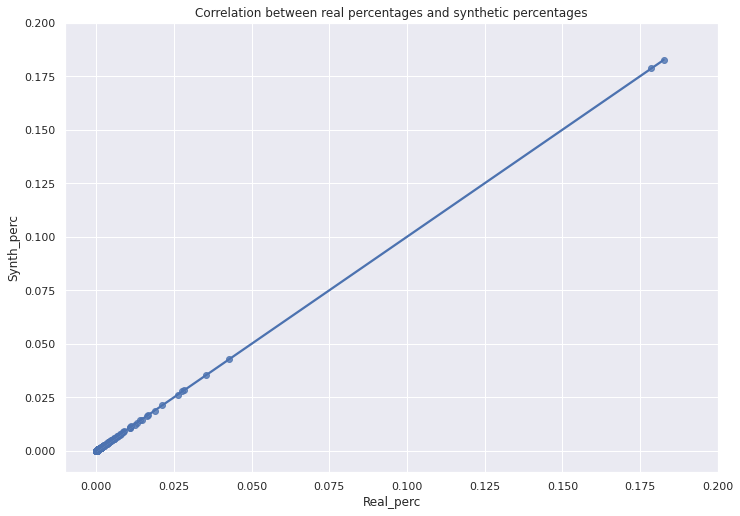

In [78]:
# import relevant libraries
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax.set_xlim(-0.01, 0.2)
ax.set_ylim(-0.01, 0.2)
ax.set_title('Correlation between real percentages and synthetic percentages') 
# use the function regplot to make a scatterplot
sns.regplot(x=output['Real_perc'], y=output['Synth_perc'])

There is an obvious correlation, therefore I conclude that the method generated a realistic populatons based on given frequencies.

## Simple example to illustrate the method

In [15]:
from random import choices
# given a list of values
countries = ['China', 'India', 'United States', 'Indonesia', 'Pakistan', 'Other']
# and their distribution frequencies
# the frequencies should add up to 1
frequencies = [0.182557, 0.178469, 0.042872, 0.035347, 0.028286, 0.532469]
# generate 1000 random individuals based on the above data
result = choices(countries, frequencies, k=1000)
# display the resulting distributions
from collections import Counter
print(f'Generated frequencies: {Counter(result)}')

Generated frequencies: Counter({'Other': 524, 'China': 189, 'India': 179, 'Indonesia': 46, 'United States': 35, 'Pakistan': 27})
